In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [ ]:
data = pd.read_csv("/content/heart_2020_cleaned[1].csv")

In [ ]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
data.shape

(319795, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
data.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


<ipython-input-8-cb36ccc9d368>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_values.index, y=count_values.values, palette="viridis")


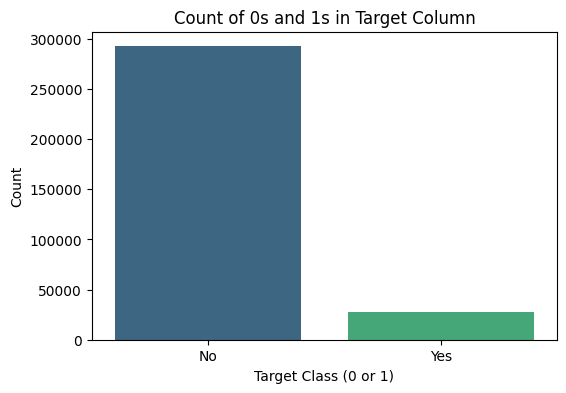

In [ ]:
count_values = data['HeartDisease'].value_counts()
print(count_values)

plt.figure(figsize=(6, 4))
sns.barplot(x=count_values.index, y=count_values.values, palette="viridis")

# Add labels and title
plt.xlabel('Target Class (0 or 1)')
plt.ylabel('Count')
plt.title('Count of 0s and 1s in Target Column')

# Show the plot
plt.show()

,0
BMI,"Axes(0.125,0.11;0.168478x0.77)"
PhysicalHealth,"Axes(0.327174,0.11;0.168478x0.77)"
MentalHealth,"Axes(0.529348,0.11;0.168478x0.77)"
SleepTime,"Axes(0.731522,0.11;0.168478x0.77)"


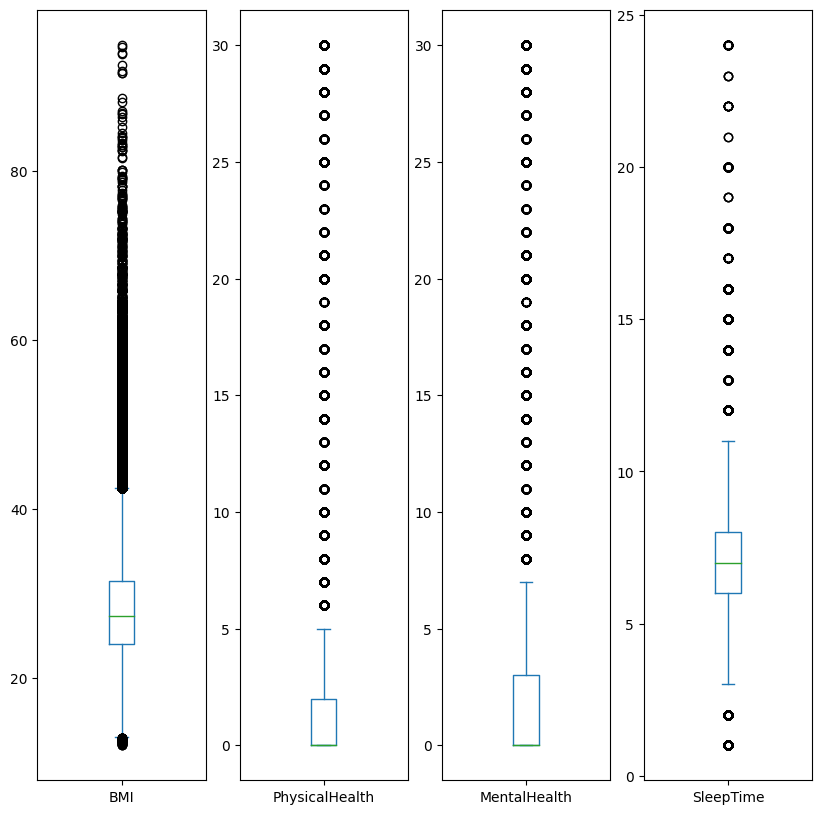

In [ ]:
data.plot(kind = "box" , subplots = True , figsize = (10,10) )

In [ ]:
lst = list(data.select_dtypes("object").columns)
lst

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [ ]:
for i in lst:
    lb = LabelEncoder()
    data[i] = lb.fit_transform(data[i])

In [ ]:
print(data.head())

   HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          30.0            0    0            7     5         2   
1           0.0            0    0           12     5         0   
2          30.0            0    1            9     5         2   
3           0.0            0    0           11     5         0   
4           0.0            1    0            4     5         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          4        5.0       1              0   

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537


In [ ]:
x = data.drop(['HeartDisease'], axis=1)
y = data['HeartDisease']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train.shape

(255836, 17)

In [ ]:
x_test.shape

(63959, 17)

**BEFORE BALANCING**

Logistic Regression

In [ ]:
log_reg = LogisticRegression(penalty='l2')

log_reg.fit(x_train_scaled, y_train)
y_pred = log_reg.predict(x_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.51      0.09      0.15      5592

    accuracy                           0.91     63959
   macro avg       0.71      0.54      0.55     63959
weighted avg       0.88      0.91      0.88     63959



KNN

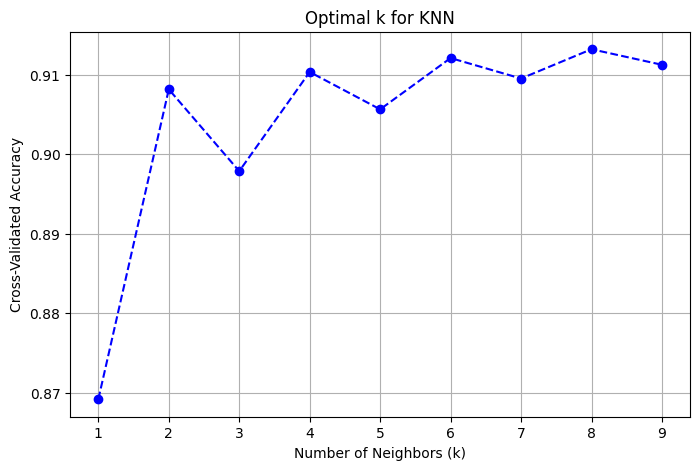

The optimal k value is: 8


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

k_values = range(1, 10)
accuracy_scores = []

# Loop over k values, perform cross-validation, and compute accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform 5-fold cross-validation
    scores = cross_val_score(knn, x_train_scaled, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# Plot the accuracy scores vs k values
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Optimal k for KNN')
plt.grid(True)
plt.show()

# Print the optimal k value
optimal_k = k_values[np.argmax(accuracy_scores)]
print(f'The optimal k value is: {optimal_k}')

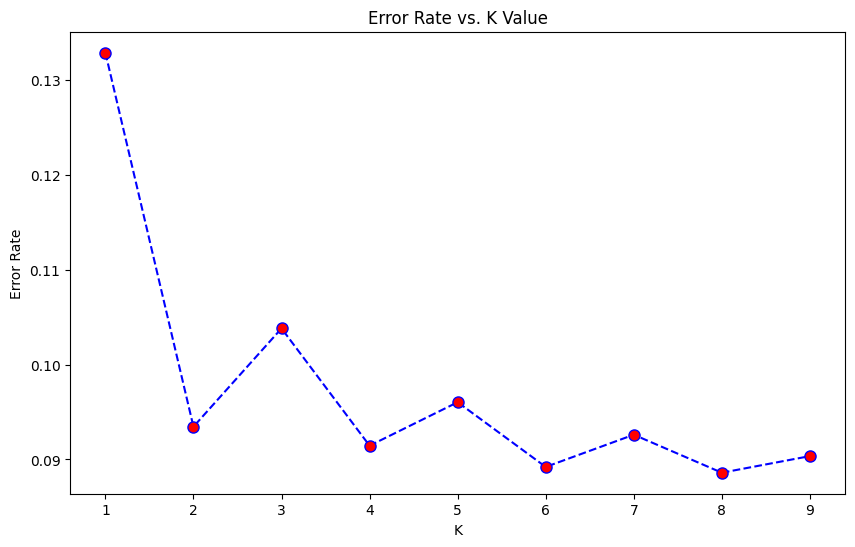

In [ ]:
from sklearn.metrics import accuracy_score

error_rate = []

# Range of k values to test
k_range = range(1, 10)

# Loop over different values of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    y_pred = knn.predict(x_test_scaled)
    error_rate.append(1 - accuracy_score(y_test, y_pred))  # Calculate error rate

# Plot error rate vs. k
plt.figure(figsize=(10,6))
plt.plot(k_range, error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xticks(k_range)
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train_scaled, y_train)
y_pred = knn.predict(x_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.44      0.08      0.13      5592

    accuracy                           0.91     63959
   macro avg       0.68      0.53      0.54     63959
weighted avg       0.88      0.91      0.88     63959



SVM

In [ ]:
svm_model = SVC(kernel='linear', C=1.0, gamma='scale', random_state=42)
svm_model.fit(x_train_scaled, y_train)
y_pred = svm_model.predict(x_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     58367
           1       0.00      0.00      0.00      5592

    accuracy                           0.91     63959
   macro avg       0.46      0.50      0.48     63959
weighted avg       0.83      0.91      0.87     63959



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest

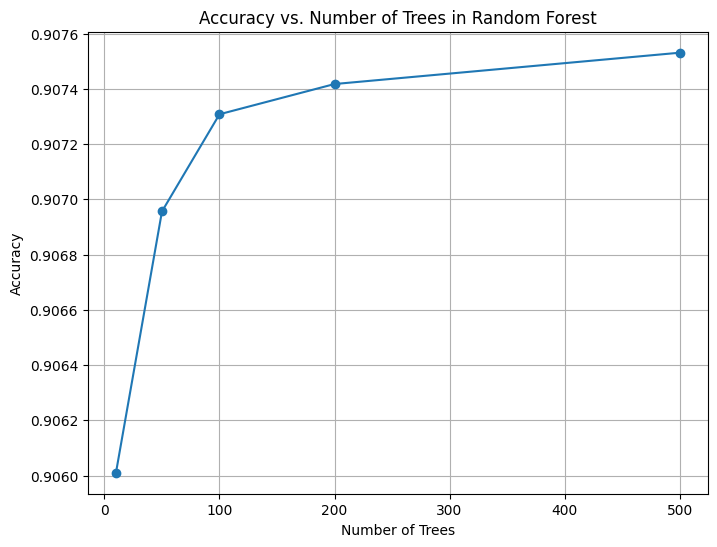

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
n_trees = [10, 50, 100, 200, 500]

cv_scores = []

for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    scores = cross_val_score(rf, x_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(n_trees, cv_scores, marker='o')
plt.title('Accuracy vs. Number of Trees in Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train_scaled, y_train)
y_pred = random_forest.predict(x_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58367
           1       0.36      0.11      0.17      5592

    accuracy                           0.90     63959
   macro avg       0.64      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959



XGBoost

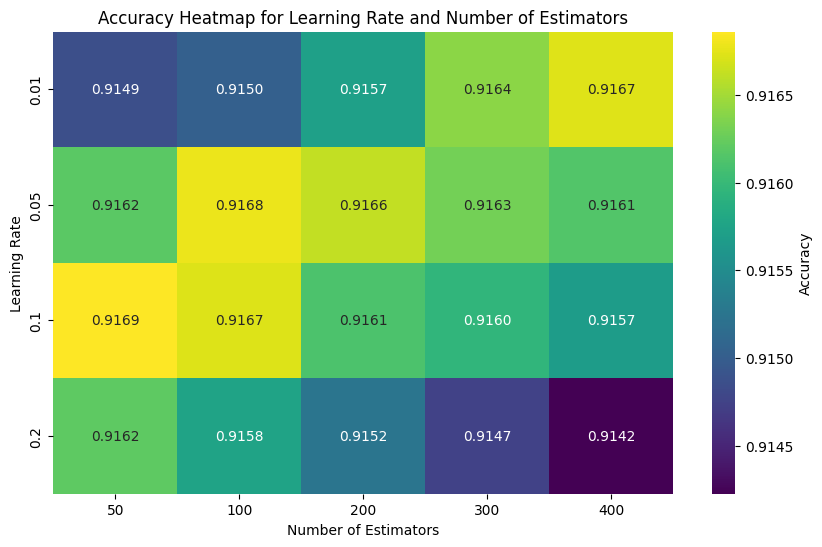

In [ ]:
learning_rates = [0.01, 0.05, 0.1, 0.2]
n_estimators = [50, 100, 200, 300, 400]
results = []

for lr in learning_rates:
    for n in n_estimators:
        xgb_model = xgb.XGBClassifier(learning_rate=lr, n_estimators=n, random_state=42)

        scores = cross_val_score(xgb_model, x_train_scaled, y_train, cv=5, scoring='accuracy')
        results.append({'learning_rate': lr, 'n_estimators': n, 'accuracy': np.mean(scores)})

results_df = pd.DataFrame(results)

heatmap_data = results_df.pivot(index='learning_rate', columns='n_estimators', values='accuracy')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.4f', cbar_kws={'label': 'Accuracy'})
plt.title('Accuracy Heatmap for Learning Rate and Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Learning Rate')
plt.show()

In [ ]:
xgb_model = XGBClassifier(learning_rate=0.05, n_estimators=100, random_state=42)
xgb_model.fit(x_train_scaled, y_train)
y_pred = xgb_model.predict(x_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.57      0.07      0.12      5592

    accuracy                           0.91     63959
   macro avg       0.75      0.53      0.54     63959
weighted avg       0.89      0.91      0.88     63959



ANN

In [ ]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[x_train.shape[1]]),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(x_train_scaled, y_train, epochs=15, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
3198/3198 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.8428 - loss: 0.3981 - val_accuracy: 0.9151 - val_loss: 0.2338
Epoch 2/15
3198/3198 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.9146 - loss: 0.2399 - val_accuracy: 0.9154 - val_loss: 0.2301
Epoch 3/15
3198/3198 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - accuracy: 0.9151 - loss: 0.2373 - val_accuracy: 0.9160 - val_loss: 0.2283
Epoch 4/15
3198/3198 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9153 - loss: 0.2326 - val_accuracy: 0.9157 - val_loss: 0.2282
Epoch 5/15
3198/3198 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.9150 - loss: 0.2314 - val_accuracy: 0.9158 - val_loss: 0.2281
Epoch 6/15
3198/3198 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.9143 - loss: 0.2342 - val_accuracy: 0.9157 - val_loss: 0.2283
Epoch 7/15
3198/3198 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.9155 - loss: 0.2302 - val_accuracy: 0.9155 - val_loss: 0.2280
Epoch 8/15
3198/3198 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.9151 - loss: 0

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy}')

1999/1999 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9117 - loss: 0.2370
Test Accuracy: 0.9138041734695435


**SMOTE**

In [ ]:
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train_scaled, y_train)

from collections import Counter
print(f'Original dataset shape: {Counter(y_train)}')
print(f'Resampled dataset shape: {Counter(y_train_balanced)}')

Original dataset shape: Counter({0: 234055, 1: 21781})
Resampled dataset shape: Counter({0: 234055, 1: 234055})


<ipython-input-24-f280bf185f00>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=original_df, x='Class', y='Count', palette='viridis')
<ipython-input-24-f280bf185f00>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=balanced_df, x='Class', y='Count', palette='viridis')


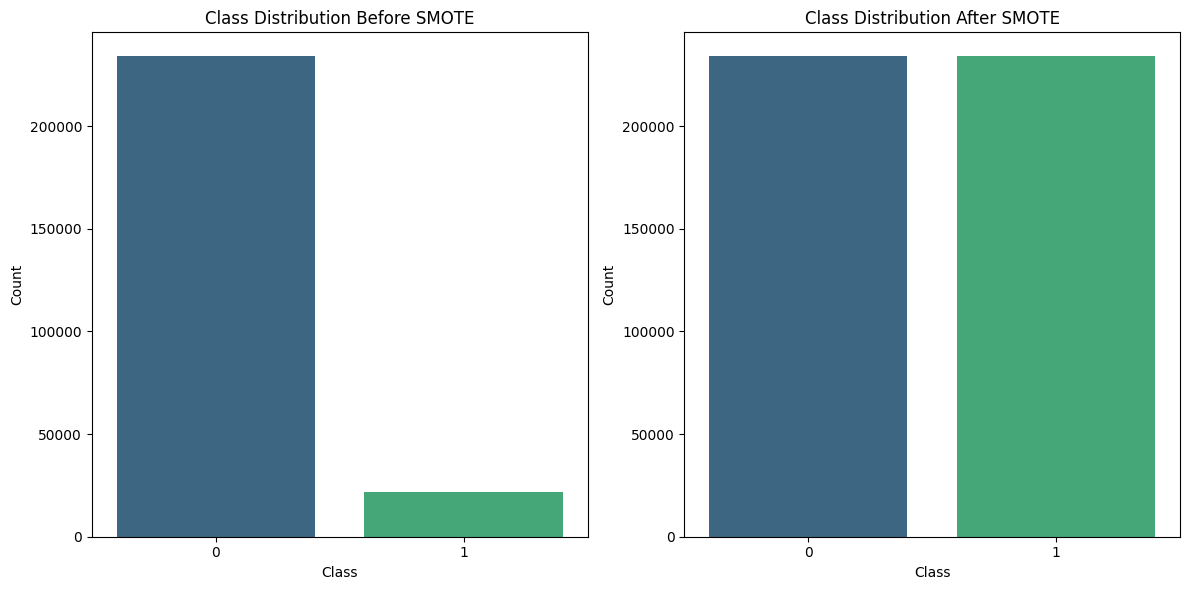

In [ ]:
import seaborn as sns

# Original class distribution
original_counts = Counter(y_train)
balanced_counts = Counter(y_train_balanced)

# Create DataFrames for plotting
original_df = pd.DataFrame(original_counts.items(), columns=['Class', 'Count'])
balanced_df = pd.DataFrame(balanced_counts.items(), columns=['Class', 'Count'])

# Plotting function
def plot_class_distribution(original_df, balanced_df):
    plt.figure(figsize=(12, 6))

    # Plot Original Distribution
    plt.subplot(1, 2, 1)
    sns.barplot(data=original_df, x='Class', y='Count', palette='viridis')
    plt.title('Class Distribution Before SMOTE')
    plt.xlabel('Class')
    plt.ylabel('Count')

    # Plot Balanced Distribution
    plt.subplot(1, 2, 2)
    sns.barplot(data=balanced_df, x='Class', y='Count', palette='viridis')
    plt.title('Class Distribution After SMOTE')
    plt.xlabel('Class')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_class_distribution(original_df, balanced_df)

In [ ]:
log_reg = LogisticRegression(penalty='l2')

log_reg.fit(x_train_balanced, y_train_balanced)
y_pred = log_reg.predict(x_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.73      0.84     58367
           1       0.22      0.77      0.34      5592

    accuracy                           0.74     63959
   macro avg       0.59      0.75      0.59     63959
weighted avg       0.91      0.74      0.79     63959



In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train_balanced, y_train_balanced)
y_pred = knn.predict(x_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88     58367
           1       0.21      0.51      0.30      5592

    accuracy                           0.79     63959
   macro avg       0.58      0.67      0.59     63959
weighted avg       0.88      0.79      0.83     63959



In [ ]:
svm_model = SVC(kernel='linear', C=1.0, gamma='scale', random_state=42)
svm_model.fit(x_train_balanced, y_train_balanced)
y_pred = svm_model.predict(x_test_scaled)

print(classification_report(y_test, y_pred))

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train_balanced, y_train_balanced)
y_pred = random_forest.predict(x_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     58367
           1       0.30      0.23      0.26      5592

    accuracy                           0.89     63959
   macro avg       0.61      0.59      0.60     63959
weighted avg       0.87      0.89      0.88     63959



In [ ]:
xgb_model = XGBClassifier(learning_rate=0.05, n_estimators=100, random_state=42)
xgb_model.fit(x_train_balanced, y_train_balanced)
y_pred = xgb_model.predict(x_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92     58367
           1       0.29      0.50      0.37      5592

    accuracy                           0.85     63959
   macro avg       0.62      0.69      0.64     63959
weighted avg       0.89      0.85      0.87     63959



**ANN**

In [ ]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[x_train.shape[1]]),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(x_train_balanced, y_train_balanced, epochs=15, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
5852/5852 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.7285 - loss: 0.5423 - val_accuracy: 0.7282 - val_loss: 0.6316
Epoch 2/15
5852/5852 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.7639 - loss: 0.4816 - val_accuracy: 0.6970 - val_loss: 0.6364
Epoch 3/15
5852/5852 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.7664 - loss: 0.4768 - val_accuracy: 0.7088 - val_loss: 0.6292
Epoch 4/15
5852/5852 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - accuracy: 0.7695 - loss: 0.4740 - val_accuracy: 0.7136 - val_loss: 0.6089
Epoch 5/15
5852/5852 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - accuracy: 0.7714 - loss: 0.4717 - val_accuracy: 0.7368 - val_loss: 0.6134
Epoch 6/15
5852/5852 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.7709 - loss: 0.4716 - val_accuracy: 0.7118 - val_loss: 0.6183
Epoch 7/15
5852/5852 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - accuracy: 0.7733 - loss: 0.4689 - val_accuracy: 0.7370 - val_loss: 0.5963
Epoch 8/15
5852/5852 ━━━━━━━━━━━━━━━━━━━━ 79s 7ms/step - accuracy: 0.7737 - loss: 0

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy}')

1999/1999 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8000 - loss: 0.3895
Test Accuracy: 0.8030144572257996
